## Prepare
import and set variable

In [1]:
# -*- coding:UTF-8 -*-

    
from corpus import *
from vsm import *

c.words

# train the model and create a TfViewer object
tf = TF(c, context_type)
tf.train()
tf_v = TfViewer(c, tf)

# print the most frequent terms in the document
# remember that IPython automatically prints the last cell of a document
tf_v.coll_freqs()


# replace 'topic_range[0]' with a specific number, if you like
k = topic_range[4]

# load the topic model
v = lda_v[k]

#v.topics()

#v.doc_topics(v.labels[:3])

v.aggregate_doc_topics(v.labels[:], normed_sum=True)

#v.dist(v.labels[0], v.labels[1])
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='wqy-microhei.ttc')
import sys
reload(sys)
kongzi = []
mengzi = []
xunzi =[]

count = 0
for label in v.labels[:]:
    if '孟子' in label:
        mengzi.append(count)
    elif '论语' in label:
        kongzi.append(count)
    elif '荀子' in label:
        xunzi.append(count)
    count += 1



Running from notebook, using serial load function.
[20, 40, 60, 80, 100]
/home/inpho/inpho/kmx/models/kmx-freq5-freq5-N2523342-LDA-K{0}-document-2000.npz
Loading LDA data from /home/inpho/inpho/kmx/models/kmx-freq5-freq5-N2523342-LDA-K100-document-2000.npz


## functions:

In [ ]:
# get term frequency in a particular corpus

def term_freq_labels(term,labels):
    count = 0
    for i in labels: 
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        count += (document == term.decode('utf-8')).sum()
    return count
#get the whole occurrances in a corpus

def allfreq(labels):
    countall = 0    
    for i in labels:
        #wenzi = []
        num = []
        index = c.meta_int('document', {'document_label' : v.labels[i]})
        document = c.view_contexts('document', as_strings=True)[index]
        for a in set(document):
            count = 0
            count += (document == a.decode('utf-8')).sum()
            num.append(count)
            #wenzi.append([a,count])
        countall += sum(num)
    
    return countall




## Get list for topics and topics_weight

In [ ]:
#1.找到前十的topic的编号
top10topics = []
top10topicsweight = []
for a in v.aggregate_doc_topics(v.labels[:], normed_sum=True):
    top10topics.append(a[0])
    top10topicsweight.append(a[1])
print top10topics[:10]

#2.生成每个topic的值
wordf = []
wordw = []
word=[]
for a in top10topics[:10]:
    for b in v.topics()[a][:10]:
        wordw.append(b[1])
        word.append(b[0])
        wordf.append(tf_v.coll_freq(b[0]))
def chunks(arr, n):
    return [arr[i:i+n] for i in range(0, len(arr), n)]
#print chunks(wordw,10),chunks(word,10),chunks(wordf,10)


## Figure 2  
Keyword loading in Highest Loading Ten Topics in Our Corpus
Figure 2 y label is word-weight
Figure 2.1 y label is frequency

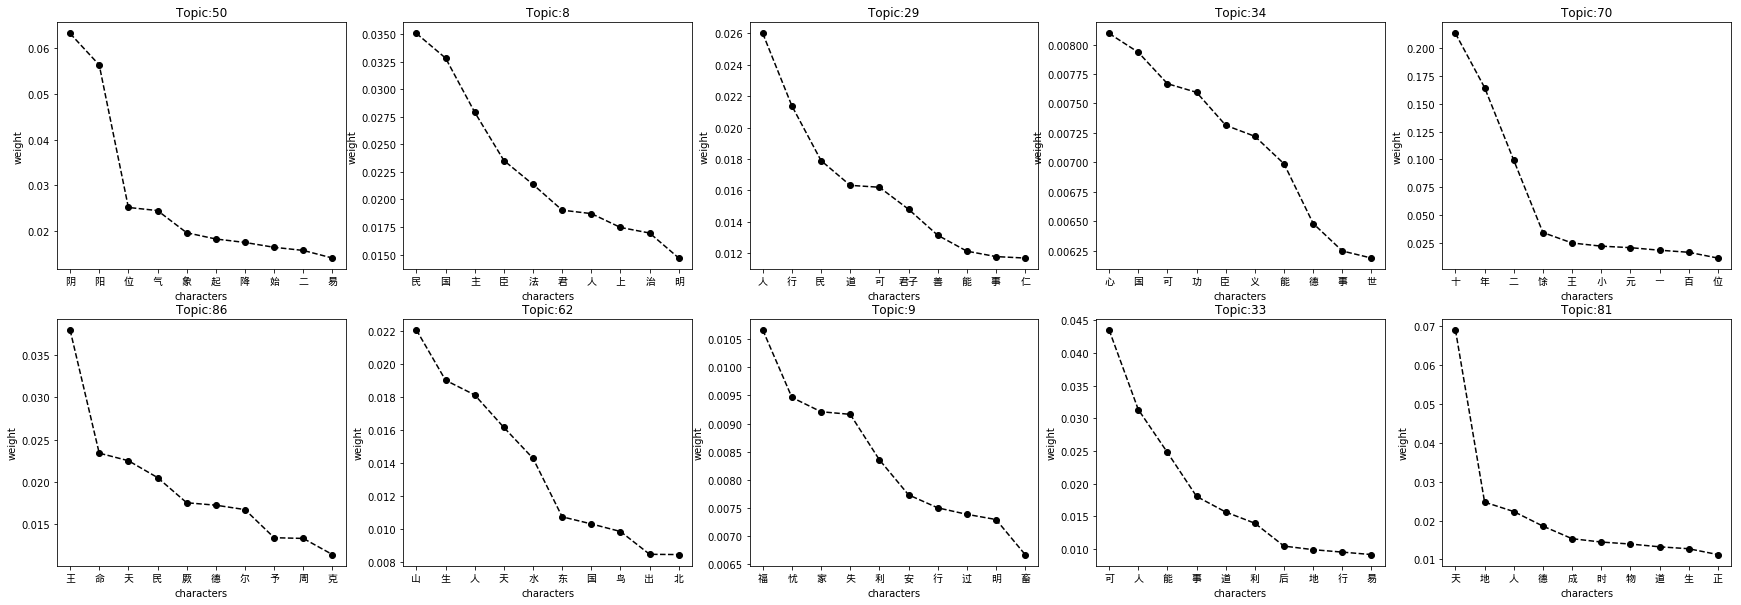

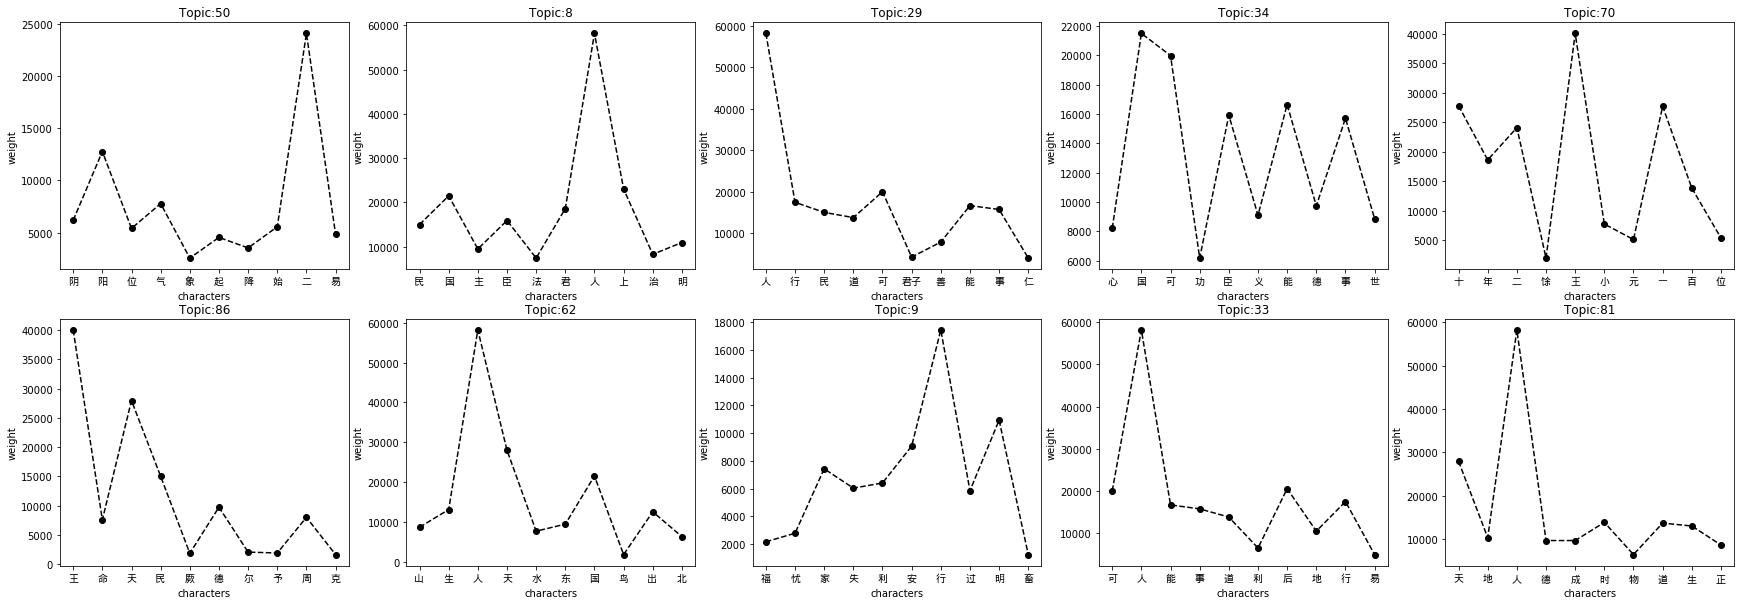

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='wqy-microhei.ttc')
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

fig2 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordw,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 2')
    
fig21 = plt.figure(figsize=(30,10))
for i in range(0,10):
    ax = plt.subplot(2,5,1+i)
    plt.plot(chunks(wordf,10)[i],'ko--')
    ticks = ax.set_xticks(range(0,10))
    labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)
    ax.set_xlabel('characters')
    ax.set_ylabel('weight')
    ax.set_title('Topic:%d'%top10topics[i])
plt.savefig('Figure 21')

## Figure 3 Highest Loading 10 Topics in Corpus
'Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'

In [5]:
v.topics(print_len=10)

[LabeledColumn([(u'\u4eba',   2.37921029e-02), (u'\u592a',   1.46462545e-02),
        (u'\u90e1',   1.20027000e-02), ..., (u'\u4ea1',   1.06536412e-07),
        (u'\u9996',   1.06536412e-07), (u'\u7978',   1.06495747e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5175',   4.30991761e-02), (u'\u6218',   2.66615283e-02),
        (u'\u5c06',   2.28827577e-02), ..., (u'\u51ac',   2.09816321e-07),
        (u'\u53d7',   2.09495994e-07), (u'\u5fd7',   2.09495994e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4eba',   2.62705218e-02), (u'\u62dc',   2.46760901e-02),
        (u'\u95e8',   1.88298449e-02), ..., (u'\u5408',   3.79417770e-07),
        (u'\u5962',   3.79417770e-07), (u'\u79bb',   3.79272961e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u7b2c',   7.23662376e-02), (u'\u5341',   6.09270483e-02),
        (u'\u4f20',   3.48987058e-02), ..., (u'\u5bfc',   8.28156601e-07),
        (u'\u7d22',   8.27840381e-07), (u'\u5fc3',   8.24678295e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4e27',   4.53525260e-02), (u'\u54ed',   3.41922790e-02),
        (u'\u6bcd',   3.33392732e-02), ..., (u'\u7235',   7.09910694e-07),
        (u'\u6d4e',   7.09368351e-07), (u'\u5e99',   7.07199035e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u519b',   7.37942532e-02), (u'\u5c06',   6.57015517e-02),
        (u'\u9a91',   1.90907270e-02), ..., (u'\u76df',   2.59238874e-07),
        (u'\u8d23',   2.58942038e-07), (u'\u7fbd',   2.58843073e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u77f3',   3.32151540e-02), (u'\u4eba',   3.08121666e-02),
        (u'\u5b98',   2.89431773e-02), ..., (u'\u6708',   5.33703769e-07),
        (u'\u5f80',   5.33703769e-07), (u'\u8d22',   5.33703769e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5e74',   3.16124260e-02), (u'\u65f6',   2.00025290e-02),
        (u'\u6708',   1.84434857e-02), ..., (u'\u660f',   3.31529179e-07),
        (u'\u4e49',   3.31529179e-07), (u'\u53f8',   3.31023017e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u6c11',   3.50462906e-02), (u'\u56fd',   3.28120813e-02),
        (u'\u4e3b',   2.79033389e-02), ..., (u'\u5352',   1.62929311e-07),
        (u'\u621a',   1.62867096e-07), (u'\u8ffd',   1.62742680e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u798f',   1.06649995e-02), (u'\u5fe7',   9.46463551e-03),
        (u'\u5bb6',   9.21071321e-03), ..., (u'\u5fd7',   2.30712331e-07),
        (u'\u5e84',   2.30712331e-07), (u'\u8c37',   2.30712331e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4eba',   3.23092490e-02), (u'\u6587',   3.09833921e-02),
        (u'\u80fd',   2.97738388e-02), ..., (u'\u5236',   2.32478527e-07),
        (u'\u98de',   2.32478527e-07), (u'\u725b',   2.32123597e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u5c06',   3.16530280e-02), (u'\u519b',   2.10256465e-02),
        (u'\u6b66',   1.68715399e-02), ..., (u'\u4ef2',   2.54713228e-07),
        (u'\u9ab8',   2.54688928e-07), (u'\u6d89',   2.54324362e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u4eba',   2.02705078e-02), (u'\u7f8c',   1.79875959e-02),
        (u'\u5e74',   1.58050302e-02), ..., (u'\u91c7',   2.50731716e-07),
        (u'\u5f80',   2.50540324e-07), (u'\u9ad8',   2.50540324e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u6c0f',   5.53922057e-02), (u'\u738b',   4.83188927e-02),
        (u'\u5468',   4.73443493e-02), ..., (u'\u4f7f',   3.13717038e-07),
        (u'\u9675',   3.12757663e-07), (u'\u4e50',   3.12757663e-07)], 
       dtype=[('word', 'O'), ('value', '<f4')]),
 LabeledColumn([(u'\u7684',   4.89937291e-02), (u'\u672c',   3.27137113e-02),
        (u'\u8bf4',   2.25196797e-02), ..., (u'\u7b26',   1.51950042e-06),
        (u'

In [6]:
from pandas import Series,DataFrame
import pandas as pd
#data = {"Topics":top10topics[:10], "Corpus Weight":top10topicsweight[:10], "Topic Name":[,,,,,,,,,],"Topic Keywords in Descending Order of Weight":chunks(word,10)} 
keywords = []
for a in chunks(word,10):
    keywords.append('  '.join(a))
topicname =['benevolent rule 德政','ethical rulership道德规范','political affairs 政治事件','political affairs 政治事件','治国','cosmos&astrology 宇宙&占卜','ethics&politics 伦理&政治','political affairs 政治事件','nature&cosmos 自然&宇宙','traditional Chinese medicine 中医']  
data3 = {"Topics":top10topics[:10],"Corpus Weight":top10topicsweight[:10],"Topic Keywords in Descending Order of Weight":keywords,"Topic Name":topicname}
f3 = DataFrame(data3,columns=['Topics','Corpus Weight','Topic Keywords in Descending Order of Weight','Topic Name'])
f3

,Topics,Corpus Weight,Topic Keywords in Descending Order of Weight,Topic Name
0,50,0.033043,阴 阳 位 气 象 起 降 始 二 易,benevolent rule 德政
1,8,0.032958,民 国 主 臣 法 君 人 上 治 明,ethical rulership道德规范
2,29,0.030444,人 行 民 道 可 君子 善 能 事 仁,political affairs 政治事件
3,34,0.030112,心 国 可 功 臣 义 能 德 事 世,political affairs 政治事件
4,70,0.029221,十 年 二 馀 王 小 元 一 百 位,治国
5,86,0.028156,王 命 天 民 厥 德 尔 予 周 克,cosmos&astrology 宇宙&占卜
6,62,0.025773,山 生 人 天 水 东 国 鸟 出 北,ethics&politics 伦理&政治
7,9,0.023637,福 忧 家 失 利 安 行 过 明 畜,political affairs 政治事件
8,33,0.023193,可 人 能 事 道 利 后 地 行 易,nature&cosmos 自然&宇宙
9,81,0.021288,天 地 人 德 成 时 物 道 生 正,traditional Chinese medicine 中医


##  Figure 4 Corpus weights Topics 0-99



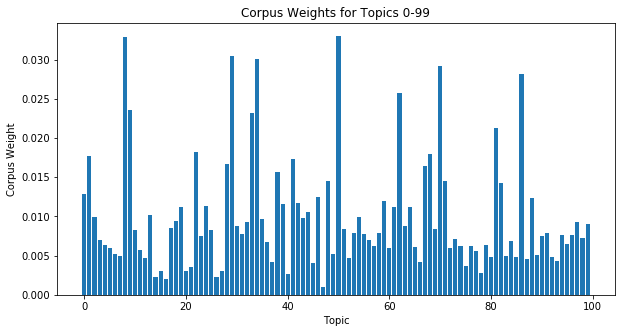

In [7]:
#图四，topic weight 分布

fig4 = plt.figure(figsize=(10,5))
#plt.plot(chunks(wordf,10)[i],'ko--')
plt.bar(top10topics, top10topicsweight)
#plt.ylim(0, max(mean_values) * 1.1)
#ticks = ax.set_xticks(range(0,10))
#labels = ax.set_xticklabels(chunks(word,10)[i],fontproperties=myfont)

plt.xlabel('Topic')  
plt.ylabel('Corpus Weight')  
plt.title('Corpus Weights for Topics 0-99')  
plt.savefig('figure4')

## Figure 5 

They are using topic 34. I just copy the term in their topic

need to find our topic again

In [8]:
term = ['君','人','义','礼','能','贤','莫','天','恶','安']
English = ['nobleman','person','rigteousness','ritual','able','virtuous','do not','day/heaven','evil','peace']

occurrencex = []
occurrencem = []
occurrencek = []

for a in term:
    occurrencek.append(term_freq_labels(a,kongzi))
    occurrencem.append(term_freq_labels(a,mengzi))
    occurrencex.append(term_freq_labels(a,xunzi)) 


    
    
    
k = allfreq(kongzi)
m = allfreq(mengzi)
x = allfreq(xunzi)
k_per_1000 = []
m_per_1000 = []
x_per_1000 = []

for a in occurrencek:
    k_per_1000.append(a*1000/float(k))
for a in occurrencek:
    m_per_1000.append(a*1000/float(m))
for a in occurrencek:
    x_per_1000.append(a*1000/float(x))

Results shows that our numbers are different ， need checked

To do：
Term rank


In [9]:
data5 = {"Mengzi per 1000 characters":m_per_1000,"Xunzi per 1000 characters":x_per_1000,"Kongzi per 1000 characters":k_per_1000,"Term":term,"English":English,"Occurrences in Kongzi":occurrencek,"Occurrences in Mengzi":occurrencem,"Occurrences in Xunzi":occurrencex}
f5 = DataFrame(data5,columns=['Term','English','Occurrences in Kongzi','Kongzi per 1000 characters','Occurrences in Mengzi','Mengzi per 1000 characters','Occurrences in Xunzi','Xunzi per 1000 characters'])
f5

,Term,English,Occurrences in Kongzi,Kongzi per 1000 characters,Occurrences in Mengzi,Mengzi per 1000 characters,Occurrences in Xunzi,Xunzi per 1000 characters
0,君,nobleman,48,6.333289,176,2.479467,249,1.142694
1,人,person,201,26.520649,595,10.382768,1176,4.785031
2,义,rigteousness,24,3.166645,109,1.239733,315,0.571347
3,礼,ritual,75,9.895765,70,3.874167,341,1.785459
4,能,able,67,8.840216,140,3.460923,518,1.595010
5,贤,virtuous,25,3.298588,76,1.291389,152,0.595153
6,莫,do not,18,2.374984,60,0.929800,255,0.428510
7,天,day/heaven,48,6.333289,292,2.479467,557,1.142694
8,恶,evil,39,5.145798,80,2.014567,190,0.928439
9,安,peace,17,2.243040,24,0.878145,190,0.404704


## Figure 6   Topic 27 Keywords & Weight
Topic 27 没有相同内容的topic（白马非法论和坚白论）

In [10]:
Chinese = []
Pinyin = ['tian','yu','shi','jian','gui','long','xiong','bing','ji','ren']
English = ['heaven','rain','time','see','turtle','dragon','ominous','illness','propitious','people']
WordWeight = []
for a in v.topics()[17][:10]:
    Chinese.append(a[0])
    WordWeight.append(a[1])

data6 = {"Chinese":Chinese,"pinyin":Pinyin,"English":English,"word weight":WordWeight}
f6 = DataFrame(data6,columns=['Chinese','pinyin','English','word weight'])
f6

,Chinese,pinyin,English,word weight
0,将,tian,heaven,0.015996
1,叔,yu,rain,0.014681
2,君,shi,time,0.013985
3,王,jian,see,0.012840
4,晋,gui,turtle,0.012747
5,使,long,dragon,0.012360
6,氏,xiong,ominous,0.012360
7,楚,bing,illness,0.011726
8,及,ji,propitious,0.010906
9,命,ren,people,0.010581


## Figure 7 Weightiest 10 topics in each of Analects,Mencius&Xunzi


In [11]:

la = kongzi

topick=[]

keywordsk = []
keywordk=[]
topicweightk=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topick.append(a[0])
    topicweightk.append(a[1])
    
for a in topick:
    for b in v.topics()[a][:10]:
        keywordsk.append(b[0])

        
for a in chunks(keywordsk,10):
    keywordk.append('  '.join(a))

    


In [12]:
data71 = {"Topic":topick,"Keywords":keywordk,"Text Weight in Kongzi":topicweightk}
f71 = DataFrame(data71,columns=['Topic','Keywords','Text Weight in Kongzi'])
f71

,Topic,Keywords,Text Weight in Kongzi
0,59,孔 人 可 闻 贡 鲁 君子 行 路 礼,0.339094
1,29,人 行 民 道 可 君子 善 能 事 仁,0.253932
2,39,人 孟 义 可 死 天 君 行 仁 士,0.066803
3,48,礼 祭 事 天 侯 庙 后 敬 亲 宗,0.030248
4,82,君 臣 人 国 对 寡 民 行 闻 事,0.030137
5,41,人 君 使 死 可 闻 将 国 生 能,0.023668
6,69,衣 服 食 车 冠 白 一 肉 文 玉,0.022105
7,88,贤 学 能 贵 人 富 行 士 世 道,0.021439
8,53,天 人 国 王 利 义 可 上 民 爱,0.016245
9,13,氏 王 周 后 伯 武 姓 世 侯 文,0.013819


In [13]:
la = mengzi

topicm=[]

keywordsm = []
keywordm=[]
topicweightm=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicm.append(a[0])
    topicweightm.append(a[1])
    
for a in topicm:
    for b in v.topics()[a][:10]:
        keywordsm.append(b[0])

        
for a in chunks(keywordsm,10):
    keywordm.append('  '.join(a))

    

data72 = {"Topic":topicm,"Keywords":keywordm,"Text Weight in Mengzi":topicweightm}
f72 = DataFrame(data72,columns=['Topic','Keywords','Text Weight in Mengzi'])
f72

,Topic,Keywords,Text Weight in Mengzi
0,50,阴 阳 位 气 象 起 降 始 二 易,0.054582
1,70,十 年 二 馀 王 小 元 一 百 位,0.047636
2,86,王 命 天 民 厥 德 尔 予 周 克,0.045893
3,29,人 行 民 道 可 君子 善 能 事 仁,0.040402
4,9,福 忧 家 失 利 安 行 过 明 畜,0.040134
5,62,山 生 人 天 水 东 国 鸟 出 北,0.033364
6,68,汤 升 一 二 服 方 水 味 去 汗,0.030537
7,34,心 国 可 功 臣 义 能 德 事 世,0.026743
8,81,天 地 人 德 成 时 物 道 生 正,0.022101
9,48,礼 祭 事 天 侯 庙 后 敬 亲 宗,0.021973


In [14]:
la = xunzi

topicx=[]

keywordsx = []
keywordx=[]
topicweightx=[]

for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True)[:10]:
    topicx.append(a[0])
    topicweightx.append(a[1])
    
for a in topicx:
    for b in v.topics()[a][:10]:
        keywordsx.append(b[0])

        
for a in chunks(keywordsx,10):
    keywordx.append('  '.join(a))

    
    
data73 = {"Topic":topicx,"Keywords":keywordx,"Text Weight in Xunzi":topicweightx}
f73 = DataFrame(data73,columns=['Topic','Keywords','Text Weight in Xunzi'])
f73

,Topic,Keywords,Text Weight in Xunzi
0,97,人 天 礼 能 义 可 乱 法 莫 道,0.268984
1,29,人 行 民 道 可 君子 善 能 事 仁,0.172588
2,22,王 天 国 亡 文 能 贤 侯 民 周,0.067423
3,8,民 国 主 臣 法 君 人 上 治 明,0.054744
4,88,贤 学 能 贵 人 富 行 士 世 道,0.040743
5,59,孔 人 可 闻 贡 鲁 君子 行 路 礼,0.038413
6,33,可 人 能 事 道 利 后 地 行 易,0.031941
7,82,君 臣 人 国 对 寡 民 行 闻 事,0.021057
8,54,立 二 名 门 百 方 外 宫 主,0.020412
9,62,山 生 人 天 水 东 国 鸟 出 北,0.019091


##
Per 1000 Characters = (tf_v.coll_freq(Term[i])  /  sum(text[]))

## Figure 8 Topics Differentiating Analects, Mencius and Xunzi from one another

In [15]:
kmx=[]
km=[]
kx=[]
dk=[]
mx=[]
dm=[]
dx=[]
for a in range(0,100):
    if a in topick:
        if a in topicm:
            if a in topicx:
                kmx.append(a)
            else:
                km.append(a)
        else:
            if a in topicx:
                kx.append(a)
            else:
                dk.append(a)
    else:
        if a in topicm:
            if a in topicx:
                mx.append(a)
            else:
                dm.append(a)
        else:
            if a in topicx:
                dx.append(a)
print kmx,km,kx,dk,mx,dm,dx
                
        

In [16]:
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
name =['','','','history 历史','politician 政治人物','political affairs 政治事件','law and discipline rite 礼法','politics&war 政治&战争','political affairs 政治事件','public office 官职','political affairs&history 政治事件&历史','sacrifice 祭祀','politics&history 政治&历史','individual morality 个人道德','nature&cosmos 自然&宇宙','government 国家治理','government&ethics 政府&伦理']  
keywords=[]

for a in dk:
    
    i = topick.index(a)
    j = top10topics.index(a)
    Document.append('Analects')
    TextWeight.append(topicweightk[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordk[i])
for a in dm:
    
    i = topicm.index(a)
    j = top10topics.index(a)
    Document.append('Mengzi')
    TextWeight.append(topicweightm[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordm[i])
for a in dx:
    
    i = topicx.index(a)
    j = top10topics.index(a)
    Document.append('Xunzi')
    TextWeight.append(topicweightx[i])
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])
    keywords.append(keywordx[i])
print len(keywords),len(name)

data8 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"Name":name,"keywords":keywords}
f8 = DataFrame(data8,columns=['Document','Text Weight','Topic','Corpus Weight','Name','keywords'])
f8

,Document,Text Weight,Topic,Corpus Weight,Name,keywords
0,Analects,0.013819,13,0.010192,,氏 王 周 后 伯 武 姓 世 侯 文
1,Analects,0.066803,39,0.011621,,人 孟 义 可 死 天 君 行 仁 士
2,Analects,0.023668,41,0.017298,,人 君 使 死 可 闻 将 国 生 能
3,Analects,0.016245,53,0.007827,history 历史,天 人 国 王 利 义 可 上 民 爱
4,Analects,0.022105,69,0.008441,politician 政治人物,衣 服 食 车 冠 白 一 肉 文 玉
5,Mengzi,0.040134,9,0.023637,political affairs 政治事件,福 忧 家 失 利 安 行 过 明 畜
6,Mengzi,0.026743,34,0.030112,law and discipline rite 礼法,心 国 可 功 臣 义 能 德 事 世
7,Mengzi,0.054582,50,0.033043,politics&war 政治&战争,阴 阳 位 气 象 起 降 始 二 易
8,Mengzi,0.030537,68,0.017954,political affairs 政治事件,汤 升 一 二 服 方 水 味 去 汗
9,Mengzi,0.047636,70,0.029221,public office 官职,十 年 二 馀 王 小 元 一 百 位


## Figure 9 Topic 5's Text Weights

In [17]:
Text=[]
TextWeight5=[]

#for a in kongzi:
#    Text.append(v.labels[i])
#    for a in 

data9 = {"Text":Text,"Text weight of topic 5":TextWeight5}
f9 = DataFrame(data73,columns=['Text','Text weight of topic 5'])
f9

,Text,Text weight of topic 5


## Figure 10 Text Weights in A/M/X

In [18]:
la=kongzi
topick=[]
topicweightk=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topick.append(a[0])
    topicweightk.append(a[1])
la=mengzi
topicm=[]
topicweightm=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicm.append(a[0])
    topicweightm.append(a[1])
la=xunzi
topicx=[]
topicweightx=[]
for a in v.aggregate_doc_topics(v.labels[la[0]:la[-1]+1], normed_sum=True):
    topicx.append(a[0])
    topicweightx.append(a[1])

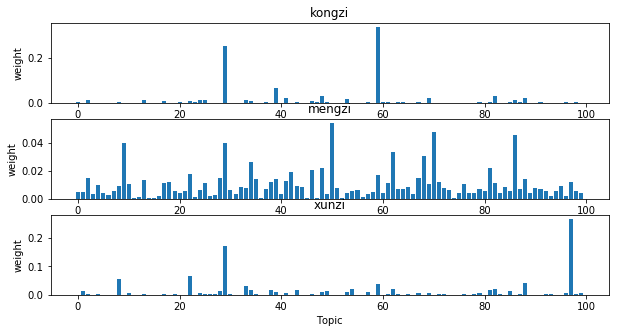

In [19]:
fig10 = plt.figure(figsize=(10,5))

ax10_1 = plt.subplot(3,1,1)
plt.bar(topick, topicweightk)
ax10_1.set_xlabel('Topic')
ax10_1.set_ylabel('weight')
ax10_1.set_title('kongzi')

ax10_2 = plt.subplot(3,1,2)
plt.bar(topicm, topicweightm)
ax10_2.set_xlabel('Topic')
ax10_2.set_ylabel('weight')
ax10_2.set_title('mengzi')

ax10_3 = plt.subplot(3,1,3)
plt.bar(topicx, topicweightx)
ax10_3.set_xlabel('Topic')
ax10_3.set_ylabel('weight')
ax10_3.set_title('xunzi')





plt.savefig('Figure 10')

##  Figure 11 Formal Interpretation Matrix of Intersections of Analects, Mencius and Xunzi with Topic Keywords (∩=intersection of sets)


In [20]:
Document=[]
TextWeight=[]
TOPIC1=[]
corpusweight =[]
name =['ethical rulership 道德规范','benevolent rule 德政','ethics&politics 伦理&政治','kindheartedness 仁','politics&war 政治&战争','filial piety 孝']
keywords=[]

for a in kmx:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KMX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordk[i1])
for a in km:
    
    i1 = topick.index(a)
    i2 = topicm.index(a)
    j = top10topics.index(a)
    Document.append('KM')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightm[i2]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordm[i2])
for a in kx:
    
    i1 = topick.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('KX')
    TextWeight.append(str(topicweightk[i1])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])
for a in mx:
    
    i2 = topicm.index(a)
    i3 = topicx.index(a)
    j = top10topics.index(a)
    Document.append('MX')
    TextWeight.append(str(topicweightm[i2])+'/'+str(topicweightx[i3]))
    TOPIC1.append(a)
    corpusweight.append(top10topicsweight[j])

    keywords.append(keywordx[i3])


data11 = {"Document":Document,"Text Weight":TextWeight,"Topic":TOPIC1,"Corpus Weight":corpusweight,"Name":name,"keywords":keywords}
f11 = DataFrame(data11,columns=['Document','Text Weight','Topic','Corpus Weight','Name','keywords'])
f11

,Document,Text Weight,Topic,Corpus Weight,Name,keywords
0,KMX,0.253932/0.0404024/0.172588,29,0.030444,ethical rulership 道德规范,人 行 民 道 可 君子 善 能 事 仁
1,KM,0.0302482/0.0219732,48,0.014548,benevolent rule 德政,礼 祭 事 天 侯 庙 后 敬 亲 宗
2,KX,0.339094/0.0384133,59,0.012005,ethics&politics 伦理&政治,孔 人 可 闻 贡 鲁 君子 行 路 礼
3,KX,0.030137/0.0210571,82,0.014250,kindheartedness 仁,君 臣 人 国 对 寡 民 行 闻 事
4,KX,0.0214395/0.0407429,88,0.012317,politics&war 政治&战争,贤 学 能 贵 人 富 行 士 世 道
5,MX,0.0333643/0.0190912,62,0.025773,filial piety 孝,山 生 人 天 水 东 国 鸟 出 北


In [21]:
print kongzi